# Wine Quality Analysis

"Wine is the most healthy and most hygienic of beverages."
Wine classification is a difficult task since taste is the least understood of the human sense.   
There are several features to predict the wine quality but the entire features will not be relevant for better prediction.

### Dataset 

The Red Wine Quality dataset contains information about various physicochemical properties of wines.

The dataset only has numeric variables:

Fixed Acidity: Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat.

Volatile Acidity: Excesss of volatile acids are undesirable and lead to unpleasant flavor.

Residual Sugar: The amount of sugar remaining after the end of the fermentation.

Chlorides: The amount of salt in the wine.

Free Sulphur dioxide: The amount of SO2 in free form.

Total Sulphur dioxide: The total amount of SO2 in the wine.

Density: It is the measure of the conversation of sugar to alcohol.

pH: Describes how acidic or basic a wine is on a scale of 0 (very acidic) to 14 (very basic).

Sulphates: The amount of mineral salts containing sulphur in thw wine.

Alcohol: Alcohol is formed as a result of yeast converting sugar during the fermentation process.

Quality: A quality label in the range of 0 (very bad) to 10 (very excellent).

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from collections import Counter

In [2]:
import warnings 
warnings.filterwarnings("ignore")

#### Loading the Data

In [3]:
df = pd.read_csv("C:/Users/grees/PycharmProjects/pythonProject_1/Red_wine_dataset.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Get a statistical Overview using describe

The describe() function in pandas is very handy in getting various summary statistics.
count: total count of non-null values in the column.
mean: the average of all the values in that column.
min: the minimum value inthe column.
max: the maximum value in the column.
25%: first quartile in the column after we arrange those values in ascending order.
50%: this is the median or the second quartile.
75%: the third quartile.
std: this is the standard deviation (ie., measure of depreciation).

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.498587,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.080321,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# Shape of the dataset. 
df.shape

(1599, 12)

In [9]:
# Data types of all the columns in the dataset.
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
# Checking for any null value in the dataset.
df.isnull().values.any()

False

In [11]:
# Checking for Duplicates.
duplicate_entries = df[df.duplicated()]
duplicate_entries.shape

(240, 12)

In [12]:
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  240


#### Unique Values of Quality(Target Variable)

In [13]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The quality has most values concentrated in the categories 5, 6, 7.
Only few observations made for the categories 3 and 8.

#### Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


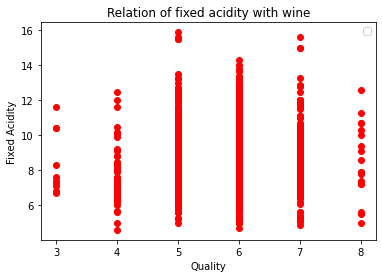

In [15]:
# Checking the variation of fixed acidity in the different qualities of wine.

plt.scatter(df['quality'], df['fixed acidity'], color = 'red')
plt.title('Relation of fixed acidity with wine')

plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.show()

In [16]:
bins = [0, 5, 7, 10]
labels = [0, 1, 2]
df["wine quality"] = pd.cut(df["quality"], bins = bins, labels = labels)

In [17]:
Counter(df["wine quality"])

Counter({0: 744, 1: 837, 2: 18})

In [18]:
Counter(df["quality"])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

#### Correlation Matrix with Heatmap

Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in the dataset.

1. Positive Correlation: Two features can be positively correlated with each other when the value of one variable increase then the value of the other variable also increases(also decreases when the other decreases).

2. Negative Correlation: Two features can be negatively correlated with each other when the value of one variable increases and the value of another variable decreases.

3. No Correlation: Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of other variable is not impacted.

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,0.027535,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,-0.046447,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,0.008411,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.040005,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.258644,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,-0.025393,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.164396,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.037944,0.148506,-0.496180,-0.174919
pH,0.027535,-0.046447,0.008411,0.040005,-0.258644,-0.025393,-0.164396,-0.037944,1.000000,-0.260512,0.233387,0.134268
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.260512,1.000000,0.093595,0.251397


From the above correlation matric, it is observed that there is relatively high positive correlation between fixed acidity and citric acid, fixed acidity and density, alcohol and quality.
Also, there is a relatively high negative correlation between fixed acidity and pH.

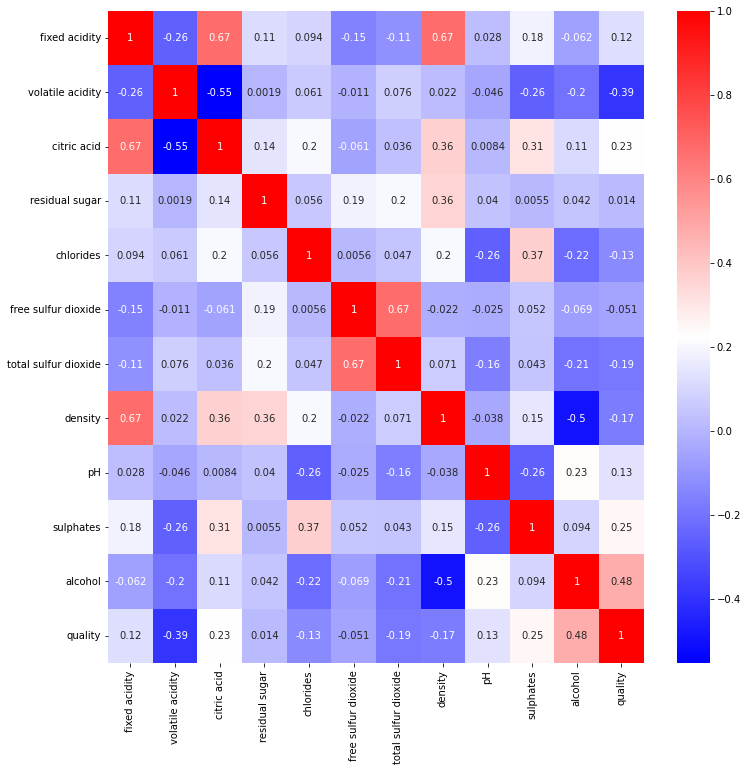

In [20]:
plt.figure(figsize = (12, 12))
sns.heatmap(data = df.corr(), annot = True, cmap = 'bwr')
plt.show()

Alcohol has the highest positive correlation with the wine quality, followed by the various other variables such as acidity, sulphates, density and chlorides.

#### Graphical relation between the data variables

#### Histogram

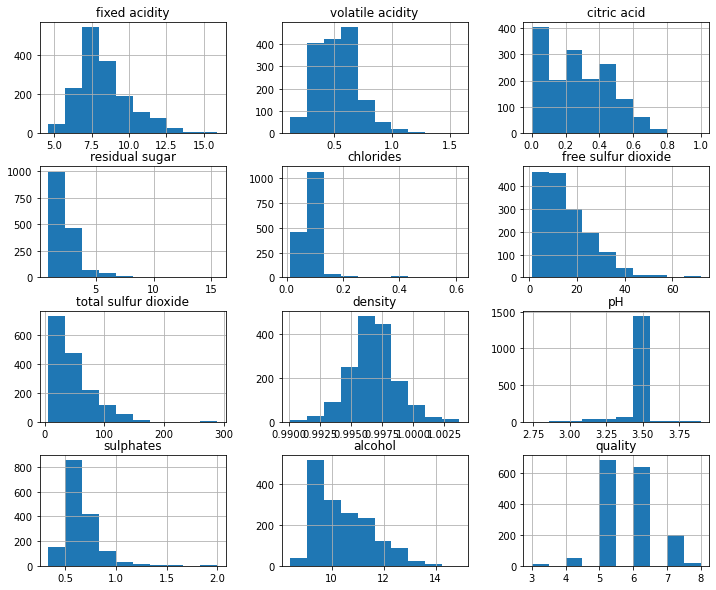

In [21]:
df.hist(bins = 10, figsize = (12, 10))
plt.show()

The attributes 'density' and 'pH' are quite normally distributed.
In the attribute 'quality', it is observed that the wines with average quality (5 to 7) are more than wines lwith bad(1-4) and good(8-10) quality.

#### Countplot

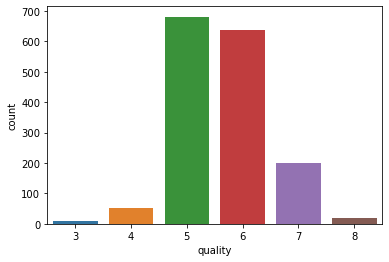

In [22]:
sns.countplot(x = "quality", data = df)
plt.show()

The average (5-7) quality of wines are more than good(1-4) and bad(8-10) quality of wines.

<AxesSubplot:xlabel='wine quality', ylabel='count'>

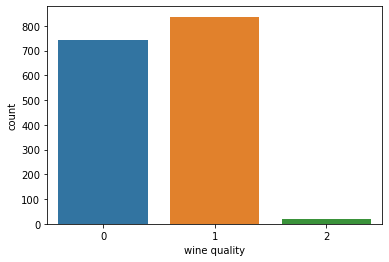

In [23]:
sns.countplot(x="wine quality",data=df)

### Modeling

#### Categorising Wine Quality

In [24]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews
trainx = df.drop(['quality', 'Reviews'] , axis = 1)
trainy = df['Reviews']

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
# Standardize the data

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(trainx, trainy, test_size = 0.2, random_state = 42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

score = {}

#### Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

predicted_rfc = rfc.predict(x_test)

print(classification_report(y_test, predicted_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       0.67      0.67      0.67       320
weighted avg       0.99      1.00      1.00       320



In [28]:
rfc_conf_matrix = confusion_matrix(y_test, predicted_rfc)
rfc_acc_score = accuracy_score(y_test, predicted_rfc)

print(rfc_conf_matrix)
print(rfc_acc_score*100)

score.update({'Random_forest_classifier': rfc_acc_score*100})

[[  0   1   0]
 [  0 314   0]
 [  0   0   5]]
99.6875


####  Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

predicted_lr = lr.predict(x_test)

print(classification_report(y_test, predicted_lr))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00       314
           3       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       0.67      0.67      0.67       320
weighted avg       0.99      1.00      1.00       320



In [30]:
lr_conf_matrix = confusion_matrix(y_test, predicted_lr)
lr_acc_score = accuracy_score(y_test, predicted_lr)

print(lr_conf_matrix)
print(lr_acc_score*100)

score.update({'logistic_regressor': lr_acc_score*100})

[[  0   1   0]
 [  0 314   0]
 [  0   0   5]]
99.6875


#### Support Vector Classifier

In [31]:
svc =  SVC()
svc.fit(x_train, y_train)

predicted_svc = svc.predict(x_test)

print(classification_report(y_test, predicted_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      1.00       314
           3       1.00      0.80      0.89         5

    accuracy                           0.99       320
   macro avg       0.66      0.60      0.63       320
weighted avg       0.99      0.99      0.99       320



In [32]:
svc_conf_matrix = confusion_matrix(y_test, predicted_svc)
svc_acc_score = accuracy_score(y_test, predicted_svc)

print(svc_conf_matrix)
print(svc_acc_score*100)

score.update({'Support Vector Classifier': svc_acc_score*100})

[[  0   1   0]
 [  0 314   0]
 [  0   1   4]]
99.375


#### Decision Tree Classifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

predicted_dt = dt.predict(x_test)

print(classification_report(y_test, predicted_dt))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.97      0.99       314
           3       1.00      1.00      1.00         5

    accuracy                           0.97       320
   macro avg       0.67      0.66      0.66       320
weighted avg       0.99      0.97      0.98       320



In [34]:
dt_conf_matrix = confusion_matrix(y_test, predicted_dt)
dt_acc_score = accuracy_score(y_test, predicted_dt)

print(dt_conf_matrix)
print(dt_acc_score*100)

score.update({'DecisionTreeClassifier': dt_acc_score*100})

[[  0   1   0]
 [  8 306   0]
 [  0   0   5]]
97.1875


#### Comparison Between Different Classifiers

In [35]:
model_acc = pd.DataFrame()

model_acc['Models'] = score.keys() 
model_acc['Accuracy'] = score.values()

model_acc

,Models,Accuracy
0,Random_forest_classifier,99.6875
1,logistic_regressor,99.6875
2,Support Vector Classifier,99.3750
3,DecisionTreeClassifier,97.1875


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

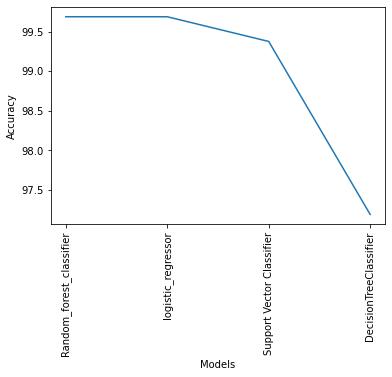

In [36]:
from matplotlib.pyplot import xticks

sns.lineplot(x = 'Models', y = 'Accuracy', data = model_acc)
xticks(rotation = 90)